In [2]:
import astropy.coordinates 

In [20]:
import ugradio
import astropy.units as u
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.coordinates import Galactic
import logging
import time
import numpy as np
import math
from ugradio import leo
import astropy as astropy
from astropy.coordinates import SkyCoord                         # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5         # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude       # Angles
from astropy.time import Time


In [21]:

# Galactic coordinates (l, b) of the object
galactic_coords = SkyCoord(l=120*u.deg, b=0*u.deg, frame='galactic')

# Observing location (latitude, longitude, elevation)
observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)

# Time of observation
obs_time = astropy.time.Time(time.time(), format='unix')

# Convert to AltAz frame
altaz_coords = galactic_coords.transform_to(AltAz(obstime=obs_time, location=observing_location))

# Extract altitude and azimuth
altitude = altaz_coords.alt
azimuth = altaz_coords.az

print(f"Altitude: {altitude}")
print(f"Azimuth: {azimuth}")

Altitude: 27.153068619678812 deg
Azimuth: 330.2479675025069 deg


In [22]:
def leusch_gal_to_AltAz(L,B):

    # set galactic coordinates 
    galactic_coords = SkyCoord(l = L*u.deg, b = B*u.deg, frame = 'galactic') 

    # set Leuschner observation location (latitude, longtidue, elevation)
    Leusch_coords = EarthLocation(lat = leo.lat*u.deg, lon = -leo.lon*u.deg, height = leo.alt*u.m)

    # set observation time in UNIX 
    observation_time = astropy.time.Time(time.time(), format = 'unix')

    # convert to AltAz using astropy transformation 
    alt_az_coords = galactic_coords.transform_to(AltAz(obstime = observation_time, location = Leusch_coords))

    # get ra, dec
    
    # extract altitude and azimuth from the coordinates 
    alt_point = alt_az_coords.alt
    az_point = alt_az_coords.az 

    AltAz_point = [alt_point, az_point]

    return AltAz_point

In [23]:
L_array = np.arange(60, 182, 2)
B_array = np.arange(20, 62, 2)

In [24]:
print('L Array:' + str(L_array))
print('L Length:' + str(len(L_array)))

L Array:[ 60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94
  96  98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130
 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166
 168 170 172 174 176 178 180]
L Length:61


In [25]:
print('B Array:' + str(B_array))
print('B Length:' + str(len(B_array)))

B Array:[20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60]
B Length:21


In [26]:
21*61

1281

In [36]:
# Create meshgrid
X, Y = np.meshgrid(L_array, B_array)

# Create the 2D array by combining X and Y
big_grid = np.column_stack((X.ravel(), Y.ravel()))

# If you want to reshape it to a 2D array
big_grid_reshaped = big_grid.reshape(len(L_array), len(B_array), 2)

big_grid_reshaped

array([[[ 60,  20],
        [ 62,  20],
        [ 64,  20],
        ...,
        [ 96,  20],
        [ 98,  20],
        [100,  20]],

       [[102,  20],
        [104,  20],
        [106,  20],
        ...,
        [138,  20],
        [140,  20],
        [142,  20]],

       [[144,  20],
        [146,  20],
        [148,  20],
        ...,
        [180,  20],
        [ 60,  22],
        [ 62,  22]],

       ...,

       [[178,  58],
        [180,  58],
        [ 60,  60],
        ...,
        [ 92,  60],
        [ 94,  60],
        [ 96,  60]],

       [[ 98,  60],
        [100,  60],
        [102,  60],
        ...,
        [134,  60],
        [136,  60],
        [138,  60]],

       [[140,  60],
        [142,  60],
        [144,  60],
        ...,
        [176,  60],
        [178,  60],
        [180,  60]]])

In [37]:
X, Y

(array([[ 60,  62,  64, ..., 176, 178, 180],
        [ 60,  62,  64, ..., 176, 178, 180],
        [ 60,  62,  64, ..., 176, 178, 180],
        ...,
        [ 60,  62,  64, ..., 176, 178, 180],
        [ 60,  62,  64, ..., 176, 178, 180],
        [ 60,  62,  64, ..., 176, 178, 180]]),
 array([[20, 20, 20, ..., 20, 20, 20],
        [22, 22, 22, ..., 22, 22, 22],
        [24, 24, 24, ..., 24, 24, 24],
        ...,
        [56, 56, 56, ..., 56, 56, 56],
        [58, 58, 58, ..., 58, 58, 58],
        [60, 60, 60, ..., 60, 60, 60]]))

In [38]:
import pandas as pd

In [39]:
big_grid_reshaped.shape

(61, 21, 2)

In [40]:
import matplotlib.pyplot as plt

In [43]:
for i in range(len(L_array)):
    for j in range(len(B_array)):
        print(f'({big_grid_reshaped[i, j, 0]}, {big_grid_reshaped[i, j, 1]})', end=' ')
    print()

(60, 20) (62, 20) (64, 20) (66, 20) (68, 20) (70, 20) (72, 20) (74, 20) (76, 20) (78, 20) (80, 20) (82, 20) (84, 20) (86, 20) (88, 20) (90, 20) (92, 20) (94, 20) (96, 20) (98, 20) (100, 20) 
(102, 20) (104, 20) (106, 20) (108, 20) (110, 20) (112, 20) (114, 20) (116, 20) (118, 20) (120, 20) (122, 20) (124, 20) (126, 20) (128, 20) (130, 20) (132, 20) (134, 20) (136, 20) (138, 20) (140, 20) (142, 20) 
(144, 20) (146, 20) (148, 20) (150, 20) (152, 20) (154, 20) (156, 20) (158, 20) (160, 20) (162, 20) (164, 20) (166, 20) (168, 20) (170, 20) (172, 20) (174, 20) (176, 20) (178, 20) (180, 20) (60, 22) (62, 22) 
(64, 22) (66, 22) (68, 22) (70, 22) (72, 22) (74, 22) (76, 22) (78, 22) (80, 22) (82, 22) (84, 22) (86, 22) (88, 22) (90, 22) (92, 22) (94, 22) (96, 22) (98, 22) (100, 22) (102, 22) (104, 22) 
(106, 22) (108, 22) (110, 22) (112, 22) (114, 22) (116, 22) (118, 22) (120, 22) (122, 22) (124, 22) (126, 22) (128, 22) (130, 22) (132, 22) (134, 22) (136, 22) (138, 22) (140, 22) (142, 22) (144, 

In [44]:
(massive_array_reshaped[0,0,:])

NameError: name 'massive_array_reshaped' is not defined

In [45]:
df = pd.DataFrame({
    'L_array': massive_array_reshaped[:,:,0].flatten(),
    'B_array': massive_array_reshaped[:,:,1].flatten()
})

NameError: name 'massive_array_reshaped' is not defined

In [46]:
glons = np.arange(60, 180, 4.6)
glats = np.arange(20, 60, 3.4) 
pointings = np.array([(L,B) for L in glons for B in glats])

In [47]:
pointings[1]

array([60. , 23.4])

In [48]:
ra_dec_coords = []
for i in range(len(pointings)): 
    ra_dec = pointings[i].transform_to('ICRS')
    ra_dec_coords.append(ra_dec)

AttributeError: 'numpy.ndarray' object has no attribute 'transform_to'

ValueError: x and y must have same first dimension, but have shapes (61,) and (21,)

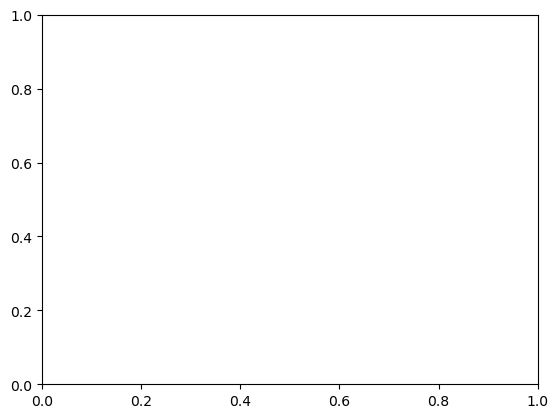

In [46]:
for i in pointings: 
    pointing = 